<a href="https://colab.research.google.com/github/Aquiles07/Actividades_Curso/blob/main/Practica3_Pandas_Fifa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analizando las estadísticas de jugadores de futbol con Pandas

![FIFA](https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/FIFA_logo_without_slogan.svg/1200px-FIFA_logo_without_slogan.svg.png)

En esta notebook, utilizarás Pandas para analizar datos de jugadores de futbol (soccer). Los datos se encuentran en forma tabular e incluyen información relevante de jugadores de futbol de todo el mundo.

---


Cada fila en el conjunto de datos contiene información sobre el jugador:
* Información personal: Nombre, nacionalidad, , edad, altura, peso y pierna preferida al jugar.
* Información como jugador: Nombre del equipo en el que juega (Club), número de playera, posición en el campo (abreviada), valor comercial y salario.
* Información sobre sus habilidades como jugador (0-100): Overall, Potential, Shooting, Defense, Passing, Physical, Control, Mental y GoalKeeping.


Durante la notebook llevarás a cabo tareas de tratamiento y análisis exploratorio de datos comunmente realizadas. Buscarás información que podría resultar útil para las organizaciones.



---



Recuerda que puedes acudir a la [documentación de Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/index.html) o a la notebook de Pandas del diplomado en ciencia de datos.



Primero, importa Pandas en tu notebook:

In [52]:
# pandas usando el alias pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Ejecuta la siguiente celda para cargar el conjunto de datos desde el repositorio en github a la máquina en colab.

In [53]:
# Fetch the dataset using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/01%20Programaci%C3%B3n%20en%20Python/data/fifa/players.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1955k  100 1955k    0     0  3221k      0 --:--:-- --:--:-- --:--:-- 3221k


Veamos las primeras líneas del archivo usando un comando de linux en la celda de colab:

In [54]:
!head -n 5 players.csv

ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,Preferred Foot,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
158023,L. Messi,Argentina,FC Barcelona,10.0,€110.5M,€565K,31,5'7,159lbs,Left,RF,94,94,86,41,87,80,96,95,11
20801,Cristiano Ronaldo,Portugal,Juventus,7.0,€77M,€405K,33,6'2,183lbs,Right,ST,94,94,88,41,81,86,84,91,12
190871,Neymar Jr,Brazil,Paris Saint-Germain,10.0,€118.5M,€290K,26,5'9,150lbs,Right,LW,92,93,81,42,80,79,92,92,12
193080,De Gea,Spain,Manchester United,1.0,€72M,€260K,27,6'4,168lbs,Right,GK,91,93,21,18,39,56,34,75,89


## Carga el conjunto de datos FIFA usando pandas

In [55]:
# leer el dataframe usando read_csv
fifa_df = pd.read_csv("players.csv", sep=',', header=0)
# mostrar los primeros elementos con head
fifa_df.head()

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,158023,L. Messi,Argentina,FC Barcelona,10.0,€110.5M,€565K,31,5'7,159lbs,...,RF,94,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0
1,20801,Cristiano Ronaldo,Portugal,Juventus,7.0,€77M,€405K,33,6'2,183lbs,...,ST,94,94,88.0,41.0,81.0,86.0,84.0,91.0,12.0
2,190871,Neymar Jr,Brazil,Paris Saint-Germain,10.0,€118.5M,€290K,26,5'9,150lbs,...,LW,92,93,81.0,42.0,80.0,79.0,92.0,92.0,12.0
3,193080,De Gea,Spain,Manchester United,1.0,€72M,€260K,27,6'4,168lbs,...,GK,91,93,21.0,18.0,39.0,56.0,34.0,75.0,89.0
4,192985,K. De Bruyne,Belgium,Manchester City,7.0,€102M,€355K,27,5'11,154lbs,...,RCM,91,92,81.0,65.0,92.0,77.0,85.0,91.0,11.0


## Características del dataset

¿Qué tipos de datos contiene nuestro dataframe?

In [56]:
for name, t in zip(fifa_df.columns, fifa_df.dtypes):
  print(name, t)

ID int64
Name object
Nationality object
Club object
Jersey Number float64
Value object
Wage object
Age int64
Height object
Weight object
Preferred Foot object
Position object
Overall int64
Potential int64
Shooting float64
Defense float64
Passing float64
Physical float64
Control float64
Mental float64
GoalKeeping float64


¿Qué tamaño tiene nuestro dataset?

Utiliza el método ```shape``` para conocer el número de filas y columnas en el dataframe.

In [57]:
m,n = fifa_df.shape
print("Filas:", m)
print("Columnas:", n)

Filas: 18207
Columnas: 21


In [58]:
assert m == 18207 and n == 21, "Error en las dimensiones"

### Estadísticas generales del dataset.

Usa ```describre()``` para mostrar las estadísticas generales de las columnas numéricas en el dataframe.

In [59]:
fifa_df.describe()

,ID,Jersey Number,Age,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
count,18207.000000,18147.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,19.546096,25.122206,66.238699,71.307299,47.736274,47.459001,53.710612,64.344512,59.236357,57.958974,16.468087
std,29965.244204,15.947765,4.669943,6.908930,6.136496,15.621702,17.314439,15.113052,9.839120,15.156389,9.933340,17.002775
min,16.000000,1.000000,16.000000,46.000000,48.000000,7.000000,7.000000,8.000000,22.000000,12.000000,25.000000,1.000000
25%,200315.500000,8.000000,21.000000,62.000000,67.000000,39.000000,35.000000,46.000000,60.000000,54.000000,51.000000,10.000000
50%,221759.000000,17.000000,25.000000,66.000000,71.000000,50.000000,52.000000,57.000000,66.000000,63.000000,58.000000,11.000000
75%,236529.500000,26.000000,28.000000,71.000000,75.000000,59.000000,61.000000,64.000000,71.000000,69.000000,65.000000,12.000000
max,246620.000000,99.000000,45.000000,94.000000,95.000000,88.000000,86.000000,92.000000,89.000000,96.000000,95.000000,89.000000


## Tratamiento de datos


### Datos faltantes

Antes de poder hacer transformaciones y operaciones en los datos, es importante identificar la posible existencia de datos faltantes. El método ```isna()``` de pandas, permite obtener un dataframe booleano que identifica entradas faltantes.

Usémos ```isna()```, ```sum(axis=0)``` y ```to_frame().T``` para resumir el resultado de datos faltantes como un conteo por columnas:

In [60]:
fifa_df.isna().sum(axis=0).to_frame().T

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,0,0,0,241,60,0,0,0,48,48,...,60,0,0,48,48,48,48,48,48,48


Una manera de tratar con datos faltantes, es eliminar las filas que contienen uno o más datos faltantes, dejando solo registros completos.

Ya que para nuestro conjunto de datos la cantidad de faltantes es mínima, podemos usar esta estrategia.

Completa la siguiente celda para eliminar filas (```axis=0```) que contengan algún dato faltante (```dropna```):

In [61]:
t_df = fifa_df.dropna(axis=0)

Verifica que no hay más datos faltantes:

In [62]:
empty_columns = t_df.isna().sum(axis=0).to_frame().T
empty_columns

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
assert empty_columns.values.sum() == 0, "Error, aun hay datos faltantes"

Finalmente, reemplazar el dataframe original por el nuevo sin elementos faltantes.

In [64]:
fifa_df = t_df

### Transformaciones

Las celdas fueron inferidas como tipo ```object``` por pandas. Algunas de éstas contienen datos numéricos que podrían ser útiles para el análisis.

Por ejemplo, las columnas ```Wage``` y ```Value``` contienen datos sobre el salario y el valor en el mercado de cada jugador. Ambas columnas contienen el signo de la moneda (€) al inicio y al final pueden contener la abreviación de cantidades (K miles, M millones).

Debemos realizar un tratamiento de datos en tales columnas para poder usarlas de manera numérica.

Primero, confirmemos que solo tenemos casos donde las cantidades terminan en K, M o sin abreviaturas. Usemos funciones de agregación.

Contemos las veces que aparecen los distintos caracteres al final de los registros en la columna ```Wage```:

In [65]:
fifa_df[["Wage"]].groupby(fifa_df.Wage.str[-1]).count()

,Wage
Wage,
K,17918


Contemos las veces que aparecen los distintos caracteres al final de los registros en la columna ```Value```:

In [66]:
fifa_df[["Value"]].groupby(fifa_df.Value.str[-1]).count()

,Value
Value,
0,11
K,11060
M,6847


In [67]:
def currency_to_numeric(currency):
  """
  La funcion recibe valores monetarios en un objeto de texto, los tranforma:
  1- Elimina el simbolo de la moneda al inicio de la cadena
  2- Extrae el caracter adicional al final de la cadena que indica el
     multiplo de la cantidad (abreviatura). No siempre hay un simbolo.
  3- Usa el valor para devolver la cantidad en numero (multiplica por el valor).
  Ej: 250K pasa a 250000
  ya que
  1K = 1000
  1M = 1000000
  Sin letra solo parte numerica
  """
  # el multiplo de K o M
  symbols = {"K": 1000, "M": 1000000}
  # Actualiza el valor de numeric con la cantidad en currency
  numeric = 0.0

  currency_value = currency.lstrip("$€£")

    # Verifica si hay un símbolo de multiplicación al final
  multiplier = 1
  if currency_value[-1] in symbols:
        multiplier = symbols[currency_value[-1]]
        # Elimina el último caracter (el símbolo de la abreviatura)
        currency_value = currency_value[:-1]

    # Convierte el valor de la moneda a flotante y multiplica por el multiplicador
  numeric = float(currency_value) * multiplier

  return numeric



Prueba tu función:

In [68]:
currency_to_numeric("$20")

20.0

In [69]:
assert currency_to_numeric("$20") == 20.0 and currency_to_numeric("$50K") == 50*10.0**3 and currency_to_numeric("$10M") == 10*10.0**6, "Error"

Cambia las columnas ```Wage``` y ```Value``` a numéricos usando ```currency_to_numeric``` elemento por elemento con ```applymap```:

In [70]:
fifa_df[["Wage", "Value"]] = fifa_df[["Wage", "Value"]].applymap(currency_to_numeric)
fifa_df.head()

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,158023,L. Messi,Argentina,FC Barcelona,10.0,110500000.0,565000.0,31,5'7,159lbs,...,RF,94,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0
1,20801,Cristiano Ronaldo,Portugal,Juventus,7.0,77000000.0,405000.0,33,6'2,183lbs,...,ST,94,94,88.0,41.0,81.0,86.0,84.0,91.0,12.0
2,190871,Neymar Jr,Brazil,Paris Saint-Germain,10.0,118500000.0,290000.0,26,5'9,150lbs,...,LW,92,93,81.0,42.0,80.0,79.0,92.0,92.0,12.0
3,193080,De Gea,Spain,Manchester United,1.0,72000000.0,260000.0,27,6'4,168lbs,...,GK,91,93,21.0,18.0,39.0,56.0,34.0,75.0,89.0
4,192985,K. De Bruyne,Belgium,Manchester City,7.0,102000000.0,355000.0,27,5'11,154lbs,...,RCM,91,92,81.0,65.0,92.0,77.0,85.0,91.0,11.0


### Suplementando la información

En el set de datos, tenemos una columna ```Position``` que indica la posición en la que el jugador se desempeña en el campo. Algo que podrás notar, es que originalmente la posición está de manera abreviada, si no conoces las abreviaturas, será complicado saber en qué posición juega cada jugador.


Para solucionar esto, usémos otro set de datos para cambiar de abreviatura a algo más descriptivo, pero manteniendo la abreviatura.

La siguiente imágen muestra las posiciónes más comunes en el campo:
![Posiciones de juego](https://raw.githubusercontent.com/jhermosillo/DIPLOMADO_CDP/main/01%20Programaci%C3%B3n%20en%20Python/images/SoccerFieldPositions.png)


Vamos a utilizar un nuevo set de datos que contiene la abreviatura de cada posición (```Abbreviation```) y su significado (```Full```).

Carga el archivo desde github a colab con la siguiente celda:

In [71]:
# Fetch the dataset using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/01%20Programaci%C3%B3n%20en%20Python/data/fifa/positions.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   772  100   772    0     0   3063      0 --:--:-- --:--:-- --:--:--  3075


Ejecuta la siguiente celda para crear y ver el nuevo dataframe con los datos de las posiciones:

In [72]:
positions_df = pd.read_csv("positions.csv", header=0, skipinitialspace=True)
positions_df.head()

,Abbreviation,Full
0,GK,Goalkeeper
1,SW,Sweeper
2,CB,Center Back
3,LCB,Left Center Back
4,RCB,Right Center Back


Utiliza el nuevo dataframe para actualizar la columna ```Position``` en el dataframe de jugadores por la posición descriptiva + abreviada.

Primero, debemos de *unir* ambos dataframes, ambos comparten una columna (pero tienen diferentes nombre) la posición abreviada.

Utiliza un método de pandas para unir el dataframe ```fifa_df``` con ```positions_df```.

*Tip: Queremos unir cada fila de la **izquierda** (cada jugador) con una sola fila de la **derecha** (su posición completa en el campo).*

In [73]:
merged_df = fifa_df.merge(positions_df, left_on="Position", right_on="Abbreviation", how="left")

In [74]:
merged_df.head()

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping,Abbreviation,Full
0,158023,L. Messi,Argentina,FC Barcelona,10.0,110500000.0,565000.0,31,5'7,159lbs,...,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0,RF,Right Forward
1,20801,Cristiano Ronaldo,Portugal,Juventus,7.0,77000000.0,405000.0,33,6'2,183lbs,...,94,88.0,41.0,81.0,86.0,84.0,91.0,12.0,ST,Striker
2,190871,Neymar Jr,Brazil,Paris Saint-Germain,10.0,118500000.0,290000.0,26,5'9,150lbs,...,93,81.0,42.0,80.0,79.0,92.0,92.0,12.0,LW,Left Wing
3,193080,De Gea,Spain,Manchester United,1.0,72000000.0,260000.0,27,6'4,168lbs,...,93,21.0,18.0,39.0,56.0,34.0,75.0,89.0,GK,Goalkeeper
4,192985,K. De Bruyne,Belgium,Manchester City,7.0,102000000.0,355000.0,27,5'11,154lbs,...,92,81.0,65.0,92.0,77.0,85.0,91.0,11.0,RCM,Right Center Midfield


In [75]:
assert len(merged_df.columns) == 23, "Error"
print("La union de ambos dataframes contiene ", len(merged_df.columns), " columnas")

La union de ambos dataframes contiene  23  columnas


Usemos la nueva columna ```Full``` para actualizar la columna ```Position``` para que contenga el significado y abreviatura de la posición:

```merged_df["Full"] + " (" + merged_df["Position"] +")"```

In [76]:
merged_df["Position"] = merged_df["Full"] + " (" + merged_df["Position"] + ")"

Muestra la columna actualizada:

In [77]:
merged_df["Position"].head(3)

0    Right Forward (RF)
1          Striker (ST)
2        Left Wing (LW)
Name: Position, dtype: object

Ahora, tenemos algunas columnas adicionales que ya no son útiles.

Eliminemos las columnas ```Abbreviation``` y ```Full``` del dataframe usando ```drop()```:

In [78]:
merged_df = merged_df.drop(["Abbreviation", "Full"], axis=1)

In [79]:
merged_df.head(3)

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,158023,L. Messi,Argentina,FC Barcelona,10.0,110500000.0,565000.0,31,5'7,159lbs,...,Right Forward (RF),94,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0
1,20801,Cristiano Ronaldo,Portugal,Juventus,7.0,77000000.0,405000.0,33,6'2,183lbs,...,Striker (ST),94,94,88.0,41.0,81.0,86.0,84.0,91.0,12.0
2,190871,Neymar Jr,Brazil,Paris Saint-Germain,10.0,118500000.0,290000.0,26,5'9,150lbs,...,Left Wing (LW),92,93,81.0,42.0,80.0,79.0,92.0,92.0,12.0


In [80]:
assert len(merged_df.columns) == 21, "Error"

Asignemos al dataframe original ```fifa_df``` el nuevo dataframe con el tratamiento de datos ya realizado:

In [81]:
fifa_df = merged_df
fifa_df.head()

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Position,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping
0,158023,L. Messi,Argentina,FC Barcelona,10.0,110500000.0,565000.0,31,5'7,159lbs,...,Right Forward (RF),94,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0
1,20801,Cristiano Ronaldo,Portugal,Juventus,7.0,77000000.0,405000.0,33,6'2,183lbs,...,Striker (ST),94,94,88.0,41.0,81.0,86.0,84.0,91.0,12.0
2,190871,Neymar Jr,Brazil,Paris Saint-Germain,10.0,118500000.0,290000.0,26,5'9,150lbs,...,Left Wing (LW),92,93,81.0,42.0,80.0,79.0,92.0,92.0,12.0
3,193080,De Gea,Spain,Manchester United,1.0,72000000.0,260000.0,27,6'4,168lbs,...,Goalkeeper (GK),91,93,21.0,18.0,39.0,56.0,34.0,75.0,89.0
4,192985,K. De Bruyne,Belgium,Manchester City,7.0,102000000.0,355000.0,27,5'11,154lbs,...,Right Center Midfield (RCM),91,92,81.0,65.0,92.0,77.0,85.0,91.0,11.0


## Análisis exploratorio

En esta sección, utilizarás distintos métodos de los dataframes de pandas para generar un análisis exploratorio. En un análisis exploratorio, se busca explorar, resumir y entender los datos.

### Jugadores con el mayor valor comercial y jugadores mejores pagados

Muestra el **Top 3** de jugadores con mayor valor (```Value```) en el mercado.

In [82]:
top_value_players = fifa_df.nlargest(3, "Value")
print("Top 3 jugadores con mayor valor en el mercado:")
print(top_value_players[["Name", "Value"]])

Top 3 jugadores con mayor valor en el mercado:
           Name        Value
2     Neymar Jr  118500000.0
0      L. Messi  110500000.0
4  K. De Bruyne  102000000.0


Muestra el **Top 3** de jugadores mejores pagados en el mundo (Salarios más altos, ```Wage```).

In [83]:
top_paid_players = fifa_df.nlargest(3, "Wage")
print("Top 3 jugadores mejor pagados en el mundo:")
print(top_paid_players[["Name", "Wage"]])

Top 3 jugadores mejor pagados en el mundo:
        Name      Wage
0   L. Messi  565000.0
7  L. Suárez  455000.0
6  L. Modrić  420000.0


### Potencial por alcanzar

Utiliza operaciones Crea una nueva columna que  muestre el potencial por alcanzar ```Potential left``` de cada jugador en el conjunto de datos. El potencial por alcanzar puede ser calculado mediante ```Potential - Overall```.

In [84]:
fifa_df["Potential left"] = fifa_df["Potential"] - fifa_df["Overall"]
fifa_df

,ID,Name,Nationality,Club,Jersey Number,Value,Wage,Age,Height,Weight,...,Overall,Potential,Shooting,Defense,Passing,Physical,Control,Mental,GoalKeeping,Potential left
0,158023,L. Messi,Argentina,FC Barcelona,10.0,110500000.0,565000.0,31,5'7,159lbs,...,94,94,86.0,41.0,87.0,80.0,96.0,95.0,11.0,0
1,20801,Cristiano Ronaldo,Portugal,Juventus,7.0,77000000.0,405000.0,33,6'2,183lbs,...,94,94,88.0,41.0,81.0,86.0,84.0,91.0,12.0,0
2,190871,Neymar Jr,Brazil,Paris Saint-Germain,10.0,118500000.0,290000.0,26,5'9,150lbs,...,92,93,81.0,42.0,80.0,79.0,92.0,92.0,12.0,1
3,193080,De Gea,Spain,Manchester United,1.0,72000000.0,260000.0,27,6'4,168lbs,...,91,93,21.0,18.0,39.0,56.0,34.0,75.0,89.0,2
4,192985,K. De Bruyne,Belgium,Manchester City,7.0,102000000.0,355000.0,27,5'11,154lbs,...,91,92,81.0,65.0,92.0,77.0,85.0,91.0,11.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17913,238813,J. Lundstram,England,Crewe Alexandra,22.0,60000.0,1000.0,19,5'9,134lbs,...,47,65,36.0,44.0,43.0,56.0,54.0,49.0,9.0,18
17914,243165,N. Christoffersson,Sweden,Trelleborgs FF,21.0,60000.0,1000.0,19,6'3,170lbs,...,47,63,40.0,24.0,30.0,47.0,44.0,38.0,9.0,16
17915,241638,B. Worman,England,Cambridge United,33.0,60000.0,1000.0,16,5'8,148lbs,...,47,67,42.0,24.0,30.0,56.0,49.0,44.0,8.0,20
17916,246268,D. Walker-Rice,England,Tranmere Rovers,34.0,60000.0,1000.0,17,5'10,154lbs,...,47,66,43.0,28.0,39.0,53.0,58.0,38.0,10.0,19


### Jóvenes promesa

Utiliza las funciones de Pandas para encontrar el **top 5** de jugadores "promesa" menores de 22 años. Ordena ascendentemente el dataframe según el potencial (```Potential```), potencial por alcanzar (```Potential left```) y su nivel (```Overall ```) actual.

In [85]:
# Filtrar jugadores menores de 22 años y ordenar el DataFrame según el potencial, potencial por alcanzar y nivel actual
top_young_promising_players = fifa_df[fifa_df['Age'] < 22].sort_values(by=["Potential", "Potential left", "Overall"], ascending=True).head(5)

# Eliminar las columnas innecesarias para la impresión
top_young_players_print = top_young_promising_players.drop(["ID", "Nationality", "Jersey Number", "Height", "Weight", "Shooting", "Passing", "Physical", "Control", "Mental", "GoalKeeping", "Potential left"], axis=1)

# Imprimir el top 5 de jugadores promesa menores de 22 años de manera más limpia
print(top_young_players_print.to_string(index=False))



         Name                   Club   Value   Wage  Age Preferred Foot                           Position  Overall  Potential  Defense
    D. Horton           Lincoln City 40000.0 1000.0   18          Right              Central Midfield (CM)       48         55     47.0
       Wu Wei    Tianjin Quanjian FC 60000.0 2000.0   21          Right Central Defensive Midfielder (CDM)       52         56     52.0
    D. Mackay             Kilmarnock 30000.0 1000.0   21          Right                    Goalkeeper (GK)       49         56     17.0
 Lee Dong Hee         Jeju United FC 50000.0 1000.0   21          Right              Central Midfield (CM)       51         57     39.0
M. Bloomfield Hamilton Academical FC 50000.0 3000.0   21          Right                       Striker (ST)       51         57     21.0


### Mejor defensa en el mundo

Encuentra al jugador con el mayor puntaje en la columna ```Defense```:

*Tip: utiliza el método ```idxmax``` para encontrar la fila donde se encuentra el mejor defensa. Después usa el índice para acceder a los datos de la fila.*

In [86]:
# Encuentra el índice del jugador con el mayor puntaje en la columna "Defense"
idx = fifa_df["Defense"].idxmax()

# Accede a los datos del jugador con el mayor puntaje en la columna "Defense"
best_defender = fifa_df.loc[idx, ["Name", "Club", "Defense", "Position"]]

print("Jugador con el mayor puntaje en la columna 'Defense':")
print(best_defender.to_string(index=False))

Jugador con el mayor puntaje en la columna 'Defense':
                       N. Kanté
                        Chelsea
                           86.0
Left Defensive Midfielder (LDM)


### Porcentaje pie preferido

Calcula el porcentaje mundial de jugadores que prefieren utilizar su pierna derecha para controlar el balón y el porcentaje que prefiere utilizar la pierna izquierda.

*Tip: El método ```value_counts()``` de objetos Series podría resultarte particularmente útil para esta tarea.*

In [87]:
pie_counts = fifa_df['Preferred Foot'].value_counts()

# Calcular el porcentaje de jugadores que prefieren cada pie
right_foot_percentage = (pie_counts['Right'] / len(fifa_df)) * 100
left_foot_percentage = (pie_counts['Left'] / len(fifa_df)) * 100

# Imprimir los resultados
print("Porcentaje de jugadores que prefieren utilizar su pierna derecha: {:.2f}%".format(right_foot_percentage))
print("Porcentaje de jugadores que prefieren utilizar su pierna izquierda: {:.2f}%".format(left_foot_percentage))

Porcentaje de jugadores que prefieren utilizar su pierna derecha: 76.77%
Porcentaje de jugadores que prefieren utilizar su pierna izquierda: 23.23%


### Equipos con mayor talento promedio

Utiliza funciones de agregación y de agrupamiento para obtener a los equipos con el mejor promedio de nivel (```Overall```) entre sus jugadores.

In [88]:
# Agrupar el DataFrame por el nombre del club y calcular el promedio de Overall para cada club
club_avg_overall = fifa_df.groupby('Club')['Overall'].mean()

# Ordenar los resultados para obtener los equipos con el mejor promedio de Overall
top_clubs = club_avg_overall.sort_values(ascending=False).head(10)


# Imprimir solo el nombre del club y el porcentaje
print("Equipos con el mejor promedio de nivel (Overall) entre sus jugadores:")
for club, overall in top_clubs.items():
    print(f"{club}: {overall:.2f}")


Equipos con el mejor promedio de nivel (Overall) entre sus jugadores:
Juventus: 82.28
Napoli: 80.00
Inter: 79.75
Real Madrid: 78.24
Milan: 78.07
FC Barcelona: 78.03
Paris Saint-Germain: 77.43
Roma: 77.42
Manchester United: 77.24
FC Bayern München: 77.00


### Equipos con más costosos (valor comercial)

Utiliza funciones de agregación y agrupamiento para encontrar el valor total de de cada club, esto es, la suma de los valores individuales de los jugadores de los Club.

Ordena de manera descendente para mostrar los clubs más costosos del mundo.

In [89]:
club_total_value = fifa_df.groupby('Club')['Value'].sum()

# Ordenar los resultados para obtener los clubes más costosos del mundo
top_clubs_expensive = club_total_value.sort_values(ascending=False)
print("Clubes más costosos del mundo basados en el valor total de sus jugadores:")
for club, total_value in top_clubs_expensive.items():
    print(f"{club}: {total_value}")

Clubes más costosos del mundo basados en el valor total de sus jugadores:
Real Madrid: 874425000.0
FC Barcelona: 852600000.0
Manchester City: 786555000.0
Juventus: 704475000.0
FC Bayern München: 679025000.0
Atlético Madrid: 644525000.0
Paris Saint-Germain: 625325000.0
Tottenham Hotspur: 618450000.0
Chelsea: 606815000.0
Manchester United: 588850000.0
Liverpool: 585055000.0
Napoli: 514000000.0
Inter: 466485000.0
Arsenal: 435990000.0
Borussia Dortmund: 420245000.0
Milan: 417000000.0
Valencia CF: 394225000.0
Lazio: 352135000.0
FC Porto: 335600000.0
Roma: 335450000.0
SL Benfica: 319250000.0
Bayer 04 Leverkusen: 317685000.0
Olympique Lyonnais: 310930000.0
Sevilla FC: 309850000.0
Sporting CP: 299225000.0
Real Betis: 297915000.0
Everton: 297610000.0
RB Leipzig: 277710000.0
Villarreal CF: 275700000.0
TSG 1899 Hoffenheim: 264725000.0
Olympique de Marseille: 258800000.0
West Ham United: 255620000.0
Borussia Mönchengladbach: 253300000.0
Ajax: 252850000.0
FC Schalke 04: 249315000.0
AS Monaco: 24477

### ¿Qué equipos tienen más mexicanos?

Muestra un top 5 de equipos con más jugadores mexicanos en el mundo.

Primero, crea un dataframe que contiene unicamente jugadores mexicanos:

*Tip: Filtra el dataframe usando ```Nationality==Mexico```*.

In [90]:
# Filtrar el DataFrame original para obtener solo jugadores mexicanos
players_mx_df = fifa_df[fifa_df['Nationality'] == 'Mexico']

# Contar el número de jugadores mexicanos en cada club
mexican_players_per_club = players_mx_df['Club'].value_counts()

# Mostrar los 5 equipos con más jugadores mexicanos en el mundo
top_5_mexican_teams = mexican_players_per_club.head(5)

# Imprimir el top 5 de equipos con más jugadores mexicanos en el mundo
print("Top 5 de equipos con más jugadores mexicanos en el mundo:")
for club, num_players in top_5_mexican_teams.items():
    print(f"{club}: {num_players} jugadores mexicanos")


Top 5 de equipos con más jugadores mexicanos en el mundo:
Guadalajara: 29 jugadores mexicanos
U.N.A.M.: 21 jugadores mexicanos
Club Atlas: 20 jugadores mexicanos
Club Necaxa: 20 jugadores mexicanos
Querétaro: 19 jugadores mexicanos


Agrupa por el nombre del club y cuenta:

In [91]:
# Agrupar por el nombre del club y contar el número de jugadores en cada club
players_count_per_club = fifa_df.groupby('Club').size()

# Convertir la serie a una cadena de texto
players_count_per_club_str = players_count_per_club.to_string()

# Imprimir solo el número de jugadores por club
print("Número de jugadores por club:")
print(players_count_per_club_str)


Número de jugadores por club:
Club
 SSV Jahn Regensburg                   29
1. FC Heidenheim 1846                  28
1. FC Kaiserslautern                   26
1. FC Köln                             28
1. FC Magdeburg                        26
1. FC Nürnberg                         29
1. FC Union Berlin                     28
1. FSV Mainz 05                        32
AC Ajaccio                             23
AC Horsens                             25
AD Alcorcón                            29
ADO Den Haag                           28
AEK Athens                             28
AFC Wimbledon                          26
AIK                                    27
AJ Auxerre                             27
AS Béziers                             25
AS Monaco                              33
AS Nancy Lorraine                      30
AS Saint-Étienne                       24
AZ Alkmaar                             30
Aalborg BK                             27
Aarhus GF                              27

## Visualización

Utiliza las opciones de visualización de Pandas.

### Histograma de las edades de los jugadores de futbol

Selecciona la columna ``Age``` del dataframe ```fifa_df``` y muestra el histograma usando las opciones de visualización de Pandas:

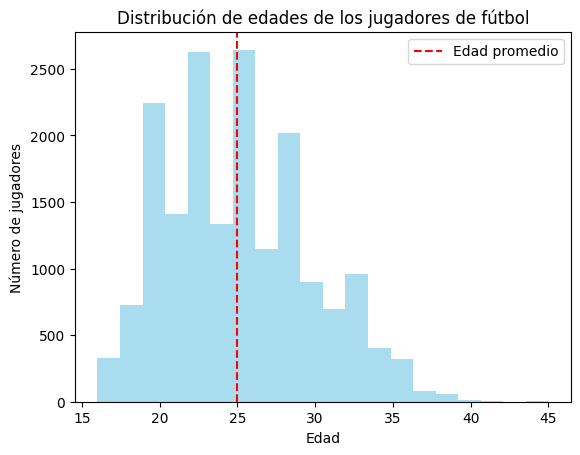

In [92]:
# Seleccionar la columna "Age" del DataFrame fifa_df
age_data = fifa_df['Age']

# Crear el histograma con título, etiquetas de ejes y color personalizado
plt.hist(age_data, bins=20, color='skyblue', alpha=0.7)
plt.xlabel('Edad')
plt.ylabel('Número de jugadores')
plt.title('Distribución de edades de los jugadores de fútbol')
plt.axvline(x=25, color='red', linestyle='--', label='Edad promedio')  # Línea de referencia
plt.legend()  # Leyenda
plt.show()


### Gráfica de Pie (Preferred Foot)

Selecciónes el conteo de valores del pie preferido (columna ```Preferred Foot```) y muestra la información mediante una gráfica de Pie:

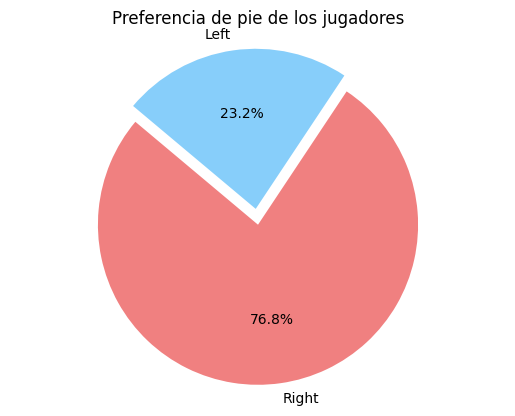

In [93]:
pie_counts = fifa_df['Preferred Foot'].value_counts()

# Obtener los nombres de las categorías (izquierda y derecha)
labels = pie_counts.index

# Colores personalizados
colors = ['lightcoral', 'lightskyblue']

# Crear el gráfico de pastel con etiquetas, porcentajes, título, leyenda, colores personalizados y aspecto circular
plt.pie(pie_counts, labels=labels, autopct='%1.1f%%', colors=colors, explode=(0, 0.1), startangle=140)
plt.title('Preferencia de pie de los jugadores')
plt.axis('equal')  # Aspecto circular
plt.show()

### Gráfica de dispersión Edad vs Potential left

Ahora, utiliza una gráfica de dispersión para visualizar el comportamiento del potencial por alcanzar (```Potential left```) de acuerdo a las edades de los jugadores:

*Tip: La gráfica debe mostrar la edad en un eje y el potencial por alcanzar en el otro.*

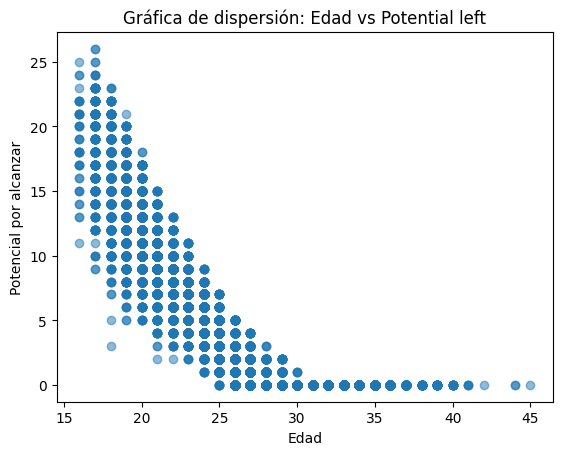

In [94]:
edad = fifa_df['Age']
potential_left = fifa_df['Potential left']

# Crear la gráfica de dispersión
plt.scatter(edad, potential_left, alpha=0.5)

# Añadir etiquetas y título
plt.xlabel('Edad')
plt.ylabel('Potencial por alcanzar')
plt.title('Gráfica de dispersión: Edad vs Potential left')

# Mostrar la gráfica
plt.show()

¿Qué otras variables o mezcla de variables sería interesante visualizar?

# Desafío Adicional

En la práctica con Numpy, creaste un modelo para identificar imágenes de dígitos escritos a mano.

Para este nuevo conjunto de datos, ¿podrías usar una metodología similar para encontrar la posición en el campo de un jugador solamente usando los valores de su habilidades?

Skills: ```Shooting 	Defense 	Passing 	Physical 	Control 	Mental 	GoalKeeping```

In [135]:
def euclidean_distance(P, Q):

    e_distancia = np.sqrt(np.sum((P[:, None] - Q) ** 2, axis=2))
    return e_distancia



In [136]:
def closest_point(distancias, representativos):
    best = np.argmin(distancias, axis=1)

    return [list(representativos.keys())[i] for i in best]

In [137]:
def accuracy(y, y_pred):

  return np.mean(y == y_pred)


In [138]:
posiciones = fifa_df['Position'].unique()
representativos = np.array([fifa_df[fifa_df['Position'] == posicion][['Shooting', 'Defense', 'Passing', 'Physical', 'Control', 'Mental', 'GoalKeeping']].mean() for posicion in posiciones])
arreglos_representativos_dict = {posiciones[i]: representativos[i] for i in range(len(posiciones))}

# Cálculo de las distancias
distancias = euclidean_distance(fifa_df[['Shooting', 'Defense', 'Passing', 'Physical', 'Control', 'Mental', 'GoalKeeping']].values, np.array(list(arreglos_representativos_dict.values())))

# Predicción de las posiciones
prediccion = closest_point(distancias, arreglos_representativos_dict)

# Cálculo de la exactitud
acc = accuracy(fifa_df['Position'].values, prediccion)
print("Eficacia del modelo: {:.2f}%".format(acc * 100))


Eficacia del modelo: 32.07%
